<a href="https://colab.research.google.com/github/NguyenNgocCongAnh/pandas/blob/canh/DAP_W9_Data_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A.Preprocessing data with pandas

* 1. Missing values
* 2. Data formatting
* 3. Dropping duplicates
* 4. Data normalization
* 5. Data standardization
* 6. Data binning



In [ ]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/thieu1995/csv-files/main/data/pandas/hepatitis.csv')
df.head(10)

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
0,30,male,False,False,False,False,False,False,False,False,False,False,False,1.0,85.0,18.0,4.0,NaN,False,live
1,50,female,False,False,True,False,False,False,False,False,False,False,False,0.9,135.0,42.0,3.5,NaN,False,live
2,78,female,True,False,True,False,False,True,False,False,False,False,False,0.7,96.0,32.0,4.0,NaN,False,live
3,31,female,NaN,True,False,False,False,True,False,False,False,False,False,0.7,46.0,52.0,4.0,80.0,False,live
4,34,female,True,False,False,False,False,True,False,False,False,False,False,1.0,NaN,200.0,4.0,NaN,False,live
5,34,female,True,False,False,False,False,True,False,False,False,False,False,0.9,95.0,28.0,4.0,75.0,False,live
6,51,female,False,False,True,False,True,True,False,True,True,False,False,NaN,NaN,NaN,NaN,NaN,False,die
7,23,female,True,False,False,False,False,True,False,False,False,False,False,1.0,NaN,NaN,NaN,NaN,False,live
8,39,female,True,False,True,False,False,True,True,False,False,False,False,0.7,NaN,48.0,4.4,NaN,False,live
9,30,female,True,False,False,False,False,True,False,False,False,False,False,1.0,NaN,120.0,3.9,NaN,False,live


In [ ]:
df.describe()

,age,bilirubin,alk_phosphate,sgot,albumin,protime
count,155.000000,149.000000,126.000000,151.00000,139.000000,88.000000
mean,41.200000,1.427517,105.325397,85.89404,3.817266,61.852273
std,12.565878,1.212149,51.508109,89.65089,0.651523,22.875244
min,7.000000,0.300000,26.000000,14.00000,2.100000,0.000000
25%,32.000000,0.700000,74.250000,31.50000,3.400000,46.000000
50%,39.000000,1.000000,85.000000,58.00000,4.000000,61.000000
75%,50.000000,1.500000,132.250000,100.50000,4.200000,76.250000
max,78.000000,8.000000,295.000000,648.00000,6.400000,100.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              155 non-null    int64  
 1   sex              155 non-null    object 
 2   steroid          154 non-null    object 
 3   antivirals       155 non-null    bool   
 4   fatigue          154 non-null    object 
 5   malaise          154 non-null    object 
 6   anorexia         154 non-null    object 
 7   liver_big        145 non-null    object 
 8   liver_firm       144 non-null    object 
 9   spleen_palpable  150 non-null    object 
 10  spiders          150 non-null    object 
 11  ascites          150 non-null    object 
 12  varices          150 non-null    object 
 13  bilirubin        149 non-null    float64
 14  alk_phosphate    126 non-null    float64
 15  sgot             151 non-null    float64
 16  albumin          139 non-null    float64
 17  protime         

## 1.Identify missing values

* the column email is not available for all the rows. In some cases it presents the NaN value, which means that the value is missing.

* we can use the function isna() to returns if an cell of the dataset if NaN or not. Then we can count how many missing values there are for each column.

In [ ]:
df.isna().sum()

age                 0
sex                 0
steroid             1
antivirals          0
fatigue             1
malaise             1
anorexia            1
liver_big          10
liver_firm         11
spleen_palpable     5
spiders             5
ascites             5
varices             5
bilirubin           6
alk_phosphate      29
sgot                4
albumin            16
protime            67
histology           0
class               0
dtype: int64

* we can count the percentage of missing values for each column, simply by dividing the previous result by the length of the dataset (len(df)) and multiplying per 100.

In [ ]:
df.isna().sum()/len(df)*100

age                 0.000000
sex                 0.000000
steroid             0.645161
antivirals          0.000000
fatigue             0.645161
malaise             0.645161
anorexia            0.645161
liver_big           6.451613
liver_firm          7.096774
spleen_palpable     3.225806
spiders             3.225806
ascites             3.225806
varices             3.225806
bilirubin           3.870968
alk_phosphate      18.709677
sgot                2.580645
albumin            10.322581
protime            43.225806
histology           0.000000
class               0.000000
dtype: float64

## When dealing with missing values

* check the source, for example by contacting the data source to correct the missing values
* drop missing values
* replace the missing value with a value
* leave the missing value as it is.

### Drop missing values

* remove rows having missing values
* remove the whole column containing missing values 
* We can use the dropna() by specifying the axis to be considered. 

*  set axis = 1 we drop the whole column. Only the columns age, sex, antivirals, histology and class remain.

In [ ]:
df2 = df.dropna(axis=1)
df2.head()

,age,sex,antivirals,histology,class
0,30,male,False,False,live
1,50,female,False,False,live
2,78,female,False,False,live
3,31,female,True,False,live
4,34,female,False,False,live


* set axis = 0 we drop the entire row. 80 rows of the dataset remain

In [ ]:
df.dropna(axis=0)

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
5,34,female,True,False,False,False,False,True,False,False,False,False,False,0.9,95.0,28.0,4.0,75.0,False,live
10,39,female,False,True,False,False,False,False,True,False,False,False,False,1.3,78.0,30.0,4.4,85.0,False,live
11,32,female,True,True,True,False,False,True,True,False,True,False,False,1.0,59.0,249.0,3.7,54.0,False,live
12,41,female,True,True,True,False,False,True,True,False,False,False,False,0.9,81.0,60.0,3.9,52.0,False,live
13,30,female,True,False,True,False,False,True,True,False,False,False,False,2.2,57.0,144.0,4.9,78.0,False,live
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,45,female,True,True,False,False,False,True,False,False,False,False,False,1.3,85.0,44.0,4.2,85.0,True,live
143,49,female,False,False,True,True,False,True,False,True,True,False,False,1.4,85.0,70.0,3.5,35.0,True,die
145,31,female,False,False,True,False,False,True,False,False,False,False,False,1.2,75.0,173.0,4.2,54.0,True,live
153,53,male,False,False,True,False,False,True,False,True,True,False,True,1.5,81.0,19.0,4.1,48.0,True,live


* However, removed values are not applied to the original dataframe, but only to the result. Use the argument inplace=True in order to store changes in the original dataframe df (df.dropna(axis=1,inplace=True)).

* we can specify only the column on which the dropping operation must be applied.

In [ ]:
df3 = df.dropna(subset=['liver_big'], axis=0)
print(df.isna().sum() / len(df) * 100)
print(df3.info())

age                 0.000000
sex                 0.000000
steroid             0.645161
antivirals          0.000000
fatigue             0.645161
malaise             0.645161
anorexia            0.645161
liver_big           6.451613
liver_firm          7.096774
spleen_palpable     3.225806
spiders             3.225806
ascites             3.225806
varices             3.225806
bilirubin           3.870968
alk_phosphate      18.709677
sgot                2.580645
albumin            10.322581
protime            43.225806
histology           0.000000
class               0.000000
dtype: float64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 145 entries, 0 to 154
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              145 non-null    int64  
 1   sex              145 non-null    object 
 2   steroid          144 non-null    object 
 3   antivirals       145 non-null    bool   
 4   fatigue          14

* we can keep only columns where there are at least the 80% of not null values by using thresh parameter.

In [ ]:
df.dropna(thresh=0.95*len(df), axis=1, inplace=True)
df.isna().sum() / len(df) * 100

age                0.000000
sex                0.000000
steroid            0.645161
antivirals         0.000000
fatigue            0.645161
malaise            0.645161
anorexia           0.645161
spleen_palpable    3.225806
spiders            3.225806
ascites            3.225806
varices            3.225806
bilirubin          3.870968
sgot               2.580645
histology          0.000000
class              0.000000
dtype: float64

### Replace missing values

* for numerical values replace the missing value with the average value of the column
* for categorial values replace the missing value with the most frequent value of the column
* use other functions

* In order to replace missing values, three functions can be used: **fillna()**, **replace()** and **interpolate()**. 
* The **fillna()** function replaces all the NaN values with the value passed as argument. For example, for numerical values, all the NaN values in the numeric columns could be replaced with the average value. 


In [ ]:
df.dtypes

age                  int64
sex                 object
steroid             object
antivirals            bool
fatigue             object
malaise             object
anorexia            object
spleen_palpable     object
spiders             object
ascites             object
varices             object
bilirubin          float64
sgot               float64
histology             bool
class               object
dtype: object

#### Numeric columns
we select numeric columns. The fill the NaN values of numeric columns with the average value, given by the df.mean() function.

In [ ]:
import numpy as np
numeric = df.select_dtypes(include=np.number)
nc_cols = numeric.columns
print(nc_cols)

Index(['age', 'bilirubin', 'sgot'], dtype='object')


In [ ]:
df4 = df[nc_cols]
df4 = df4.fillna(df4.mean())
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        155 non-null    int64  
 1   bilirubin  155 non-null    float64
 2   sgot       155 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 3.8 KB


In [ ]:
df[nc_cols] = df[nc_cols].fillna(df[nc_cols].mean())
df[nc_cols].isna().sum() / len(df) * 100

age          0.0
bilirubin    0.0
sgot         0.0
dtype: float64

#### Categorial columns
We would like to consider only boolean columns. 

However, in dtypes the boolean columns can be objects or bool. And objects can be string type (such as column: class). We need to remove the "class" column.


In [ ]:
bc_cols = df.select_dtypes(include=object).columns.tolist()
print(bc_cols)
bc_cols.remove('class')
print(bc_cols)
df[bc_cols] = df[bc_cols].astype('bool')
df[bc_cols].dtypes

['sex', 'steroid', 'fatigue', 'malaise', 'anorexia', 'spleen_palpable', 'spiders', 'ascites', 'varices', 'class']
['sex', 'steroid', 'fatigue', 'malaise', 'anorexia', 'spleen_palpable', 'spiders', 'ascites', 'varices']


sex                bool
steroid            bool
fatigue            bool
malaise            bool
anorexia           bool
spleen_palpable    bool
spiders            bool
ascites            bool
varices            bool
dtype: object

* Now we can replace all the missing values for booleans with the most frequent value. 
* Use the mode() function to calculate the most frequent value. 
* Use the fillna() function to replace missing values, but we could use also use the replace(old_value, new_value) function.

In [ ]:
df[bc_cols].head()

,sex,steroid,fatigue,malaise,anorexia,spleen_palpable,spiders,ascites,varices
0,True,False,False,False,False,False,False,False,False
1,True,False,True,False,False,False,False,False,False
2,True,True,True,False,False,False,False,False,False
3,True,True,False,False,False,False,False,False,False
4,True,True,False,False,False,False,False,False,False


In [ ]:
df[bc_cols].fillna(df.mode())

,sex,steroid,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices
0,True,False,False,False,False,False,False,False,False,False,False
1,True,False,True,False,False,False,False,False,False,False,False
2,True,True,True,False,False,True,False,False,False,False,False
3,True,True,False,False,False,True,False,False,False,False,False
4,True,True,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
150,True,True,True,True,True,True,False,False,True,True,True
151,True,True,True,False,False,True,True,False,False,False,False
152,True,False,True,True,False,False,True,False,True,False,False
153,True,False,True,False,False,True,False,True,True,False,True


In [ ]:
df.isna().sum()/len(df)*100

age                0.0
sex                0.0
steroid            0.0
antivirals         0.0
fatigue            0.0
malaise            0.0
anorexia           0.0
spleen_palpable    0.0
spiders            0.0
ascites            0.0
varices            0.0
bilirubin          0.0
sgot               0.0
histology          0.0
class              0.0
dtype: float64

#### Interpolation (Nội suy)

we could replace a missing value over a column, with the interpolation between the previous and the next ones. This can be achieved through the use of the interpolate() function.


In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/thieu1995/csv-files/main/data/pandas/hepatitis.csv')
df.isna().sum()/len(df)*100

age                 0.000000
sex                 0.000000
steroid             0.645161
antivirals          0.000000
fatigue             0.645161
malaise             0.645161
anorexia            0.645161
liver_big           6.451613
liver_firm          7.096774
spleen_palpable     3.225806
spiders             3.225806
ascites             3.225806
varices             3.225806
bilirubin           3.870968
alk_phosphate      18.709677
sgot                2.580645
albumin            10.322581
protime            43.225806
histology           0.000000
class               0.000000
dtype: float64

In [ ]:
numeric = df.select_dtypes(include=np.number)
nc_cols = numeric.columns
df[nc_cols].head(10)

,age,bilirubin,alk_phosphate,sgot,albumin,protime
0,30,1.0,85.0,18.0,4.0,NaN
1,50,0.9,135.0,42.0,3.5,NaN
2,78,0.7,96.0,32.0,4.0,NaN
3,31,0.7,46.0,52.0,4.0,80.0
4,34,1.0,NaN,200.0,4.0,NaN
5,34,0.9,95.0,28.0,4.0,75.0
6,51,NaN,NaN,NaN,NaN,NaN
7,23,1.0,NaN,NaN,NaN,NaN
8,39,0.7,NaN,48.0,4.4,NaN
9,30,1.0,NaN,120.0,3.9,NaN


* we can apply the **interpolate()** function to numeric columns, by setting also the limit direction to **forward**. This means that the linear interpolation is applied starting from the **first row until the last one.**

In [ ]:
df[nc_cols] = df[nc_cols].interpolate(method ='linear', limit_direction ='forward')
df[nc_cols].head(20)

,age,bilirubin,alk_phosphate,sgot,albumin,protime
0,30,1.00,85.0,18.000000,4.000000,NaN
1,50,0.90,135.0,42.000000,3.500000,NaN
2,78,0.70,96.0,32.000000,4.000000,NaN
3,31,0.70,46.0,52.000000,4.000000,80.0
4,34,1.00,70.5,200.000000,4.000000,77.5
5,34,0.90,95.0,28.000000,4.000000,75.0
6,51,0.95,91.6,34.666667,4.133333,77.0
7,23,1.00,88.2,41.333333,4.266667,79.0
8,39,0.70,84.8,48.000000,4.400000,81.0
9,30,1.00,81.4,120.000000,3.900000,83.0


## 2.Data Formatting

* is the process of transforming data into a common format, which helps users to perform comparisons. An example of not formatted data is the following: the same entity is referred in the same column with different values, such as New York and NY.

In [ ]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/thieu1995/csv-files/main/data/pandas/tweets.csv')
df.tail(5)

,Tweet Id,Tweet URL,Tweet Posted Time (UTC),Tweet Content,Tweet Type,Client,Retweets Received,Likes Received,Tweet Location,Tweet Language,...,Name,Username,User Bio,Verified or Non-Verified,Profile URL,Protected or Non-protected,User Followers,User Following,User Account Creation Date,Impressions
381,"""1145652120034717696""",https://twitter.com/UKNOAH/status/114565212003...,01 Jul 2019 11:15:25,#MorethanMedicine What does this mean? 🤔\nBy p...,ReTweet,Twitter Web Client,0,0,NaN,English,...,NOAH,UKNOAH,We represent the UK animal medicines industry:...,Non-Verified,https://twitter.com/UKNOAH,Non-Protected,2952,973,19 Dec 2011 16:22:28,0
382,"""1145637718493290497""",https://twitter.com/EMOverEasy/status/11456377...,01 Jul 2019 10:18:11,After a great weekend at #rebellion19 we are b...,Tweet,Twitter Web App,4,11,"DK Diner, USA",English,...,EMOverEasy,EMOverEasy,Tackling real world problems from the EM persp...,Non-Verified,https://twitter.com/EMOverEasy,Non-Protected,1345,361,09 Mar 2016 15:04:58,2694
383,"""1145628612739174400""",https://twitter.com/SIMV_RP/status/11456286127...,01 Jul 2019 09:42:00,#MorethanMedicine What does this mean? 🤔\nBy p...,ReTweet,Buffer,0,0,Paris,English,...,SIMV,SIMV_RP,Syndicat de l'Industrie du Médicament et réact...,Non-Verified,https://twitter.com/SIMV_RP,Non-Protected,948,387,27 Mar 2012 14:53:07,0
384,"""1145621305825341440""",https://twitter.com/wameyokw/status/1145621305...,01 Jul 2019 09:12:58,#MorethanMedicine What does this mean? 🤔\nBy p...,ReTweet,Twitter for Android,0,0,Nairobi Kenya,English,...,Kenneth Wameyo 🇰🇪 BVM,wameyokw,"Kenya Veterinary Association, Vet Kenya Google...",Non-Verified,https://twitter.com/wameyokw,Non-Protected,14771,5562,26 Apr 2009 09:35:59,0
385,"""1145609117618397184""",https://twitter.com/animalhealthEU/status/1145...,01 Jul 2019 08:24:32,#MorethanMedicine What does this mean? 🤔\nBy p...,Tweet,Twitter Web Client,5,2,Brussels,English,...,AnimalhealthEurope,animalhealthEU,AnimalhealthEurope represents manufacturers of...,Non-Verified,https://twitter.com/animalhealthEU,Non-Protected,3697,542,17 Dec 2012 09:14:15,7399


In [ ]:
df.describe()

,Retweets Received,Likes Received,User Followers,User Following,Impressions
count,386.000000,386.000000,386.000000,386.000000,386.000000
mean,0.730570,2.839378,2516.904145,1067.401554,1137.849741
std,1.884991,9.423381,10529.124870,1409.750825,2381.107457
min,0.000000,0.000000,0.000000,4.000000,0.000000
25%,0.000000,0.000000,348.000000,379.000000,0.000000
50%,0.000000,0.000000,796.000000,542.000000,0.000000
75%,0.000000,1.000000,2922.500000,1123.000000,882.000000
max,13.000000,98.000000,198675.000000,12476.000000,12033.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386 entries, 0 to 385
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Tweet Id                    386 non-null    object
 1   Tweet URL                   386 non-null    object
 2   Tweet Posted Time (UTC)     386 non-null    object
 3   Tweet Content               386 non-null    object
 4   Tweet Type                  386 non-null    object
 5   Client                      386 non-null    object
 6   Retweets Received           386 non-null    int64 
 7   Likes Received              386 non-null    int64 
 8   Tweet Location              325 non-null    object
 9   Tweet Language              385 non-null    object
 10  User Id                     386 non-null    object
 11  Name                        386 non-null    object
 12  Username                    386 non-null    object
 13  User Bio                    367 non-null    object

In [ ]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 317 entries, 0 to 385
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Tweet Id                    317 non-null    object
 1   Tweet URL                   317 non-null    object
 2   Tweet Posted Time (UTC)     317 non-null    object
 3   Tweet Content               317 non-null    object
 4   Tweet Type                  317 non-null    object
 5   Client                      317 non-null    object
 6   Retweets Received           317 non-null    int64 
 7   Likes Received              317 non-null    int64 
 8   Tweet Location              317 non-null    object
 9   Tweet Language              317 non-null    object
 10  User Id                     317 non-null    object
 11  Name                        317 non-null    object
 12  Username                    317 non-null    object
 13  User Bio                    317 non-null    object

### Incorrect data types
we should make sure that every column is assigned to the correct data type. This can be checked through the property dtypes.

In [ ]:
df.dtypes

Tweet Id                      object
Tweet URL                     object
Tweet Posted Time (UTC)       object
Tweet Content                 object
Tweet Type                    object
Client                        object
Retweets Received              int64
Likes Received                 int64
Tweet Location                object
Tweet Language                object
User Id                       object
Name                          object
Username                      object
User Bio                      object
Verified or Non-Verified      object
Profile URL                   object
Protected or Non-protected    object
User Followers                 int64
User Following                 int64
User Account Creation Date    object
Impressions                    int64
dtype: object

* we can convert the column **Tweet Location** to string by using the function **astype()** as follows:


In [ ]:
df['Tweet Location'] = df['Tweet Location'].astype('string')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 317 entries, 0 to 385
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Tweet Id                    317 non-null    object
 1   Tweet URL                   317 non-null    object
 2   Tweet Posted Time (UTC)     317 non-null    object
 3   Tweet Content               317 non-null    object
 4   Tweet Type                  317 non-null    object
 5   Client                      317 non-null    object
 6   Retweets Received           317 non-null    int64 
 7   Likes Received              317 non-null    int64 
 8   Tweet Location              317 non-null    string
 9   Tweet Language              317 non-null    object
 10  User Id                     317 non-null    object
 11  Name                        317 non-null    object
 12  Username                    317 non-null    object
 13  User Bio                    317 non-null    object

* We can convert all the objects to strings by

In [ ]:
obj_columns = df.select_dtypes(include=object).columns.tolist()
df[obj_columns] = df[obj_columns].astype('string')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 317 entries, 0 to 385
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Tweet Id                    317 non-null    string
 1   Tweet URL                   317 non-null    string
 2   Tweet Posted Time (UTC)     317 non-null    string
 3   Tweet Content               317 non-null    string
 4   Tweet Type                  317 non-null    string
 5   Client                      317 non-null    string
 6   Retweets Received           317 non-null    int64 
 7   Likes Received              317 non-null    int64 
 8   Tweet Location              317 non-null    string
 9   Tweet Language              317 non-null    string
 10  User Id                     317 non-null    string
 11  Name                        317 non-null    string
 12  Username                    317 non-null    string
 13  User Bio                    317 non-null    string

### Make the data homogeneous (Đồng nhất dữ liệu)


#### Categorial data
* Categorical data should have all the same formatting style, such as lower case. In order to format all categorical data to lower case, we can use the following statement:

In [ ]:
df['Tweet Content'] = df['Tweet Content'].str.lower()
df['Tweet Content'].head()

0    pets change our lives &amp; become a part of o...
1    another spot of our #morethanmedicine bus in #...
2    what a great team ⁦@healthsourceoh⁩ ⁦@local12⁩...
4    what a great team ⁦@healthsourceoh⁩ ⁦@local12⁩...
5    what a great team ⁦@healthsourceoh⁩ ⁦@local12⁩...
Name: Tweet Content, dtype: string

**Other techniques to make homogeneous categorical data**:

* remove white space everywhere: df['Tweet Content'] = df['Tweet Content'].str.replace(‘ ‘, ‘’)
* remove white space at the beginning of string: df['Tweet Content'] = df['Tweet Content'].str.lstrip()
* remove white space at the end of string: df['Tweet Content'] = df['Tweet Content']].str.rstrip()
* remove white space at both ends: df['Tweet Content'] = df['Tweet Content'].str.strip().

#### Numeric data

should have for example the same number of digits after the point. 

For example, if we want 2 decimal points, we can run the following command: 

In [ ]:
df['User Following'] = df['User Following'].round(2)
df['User Following'].head()

0     542
1    1571
2    8617
4     651
5    4866
Name: User Following, dtype: int64

**Other techniques to make homogeneous numeric data include:**

* Round up — Single DataFrame column — df['User Following'] = df['User Following'].apply(np.ceil)
* Round down — Single DataFrame column — df['User Following'] = df['User Following'].apply(np.floor).

### Different values for the same concept

It may happen that the same concept is represented in different ways. For example, in our dataset, the column Twitter Location contains the values Columbus,OH and Columbus, OH to describe the same concept. We can use the **unique()** function to list all the values of a column.

In [ ]:
df['Tweet Location'].unique()

<StringArray>
[                                 'Brussels',
                             'Pill, Bristol',
                                 'Ohio, USA',
                            'Cincinnati, OH',
                                   'WKRC TV',
                            'Scottsdale, AZ',
                               'Columbus,OH',
                              'Columbus, OH',
                             'DK Diner, USA',
                           'Minneapolis, MN',
 ...
                           'Kampala, Uganda',
                        'ilorin,kwara state',
                            'Nigeria, Lagos',
                                    'Kigali',
                        'Towcester, England',
 'Heart of the EU (the clue is in the name)',
                       'South West, England',
                                'Manchester',
                               'Seattle, WA',
                         'in my happy place']
Length: 102, dtype: string

* In order to deal with different values representing the same concept, we should manipulate each type of error separately. 

* For example, we can manipulate every string **word,word** in order to insert a space after the comma and have the following output **word, word**. We can define a function, called **set_pattern()** which searches for a specific pattern into a string and then it performs some replacement in the same string, if the pattern is found. 

* In our case we search for all the patterns having the structure **word,word** and then we replace the , with , . Finally we return the result.


In [ ]:
import re 

def set_pattern(x):
    pattern = r'[(A-Z)]\w+,([A-Z])\w+'
    res = re.match(pattern, x)
    if res:
        x = x.replace(',', ', ')
    return x

* Now we can apply the function to every value in the column Tweet Location. 
* This can be achieved by using the function apply() combined with the operator lambda. 
* We can specify that the function apply() must be applied to every row (through the parameter axis = 1) and then through the lambda operator we can select the specific row and apply it the function set_pattern().

In [ ]:
df['Tweet Location'] = df.apply(lambda x: set_pattern(x['Tweet Location']), axis=1)
df['Tweet Location'].head()

0          Brussels
1     Pill, Bristol
2         Ohio, USA
4    Cincinnati, OH
5           WKRC TV
Name: Tweet Location, dtype: object

## 3.Dropping Duplicates



In [ ]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/thieu1995/csv-files/main/data/pandas/cupcake_duplicates.csv')
df.head()

,Mese,Cupcake
0,2004-01,5
1,2004-01,5
2,2004-01,5
3,2004-02,5
4,2004-03,4


In [ ]:
df.shape

(210, 2)

### Check for the presence of duplicates

Can use the duplicated() function to check the duplicate, which returns True if a record has other duplicates, False otherwise.

In [ ]:
df.duplicated()

0      False
1       True
2       True
3      False
4      False
       ...  
205    False
206    False
207    False
208    False
209    False
Length: 210, dtype: bool

In [ ]:
df.duplicated(subset=['Mese'])

0      False
1       True
2       True
3      False
4      False
       ...  
205    False
206    False
207    False
208    False
209    False
Length: 210, dtype: bool

In [ ]:
df.duplicated().sum()

6

### Drop duplicates
We can drop duplicates through the **drop_duplicates()** function. 

* drop all duplicates, on the basis of all the columns
* drop all duplicates, on the basis of some columns

In both strategies, we can decide whether to maintain a copy of the duplicated values or not. This can be done through the **keep** parameter, passed as input to the **drop_duplicates()** function.

In [ ]:
df1 = df.drop_duplicates()
df1.shape

(204, 2)

In [ ]:
df2 = df.drop_duplicates(keep=False)
df2.shape

(201, 2)

* As an additional strategy, I can drop duplicates on the basis of a subset of columns. This can be done by using the subset parameter.

In [ ]:
df3 = df.drop_duplicates(subset=["Cupcake"])
df3.shape

(78, 2)

* In this case, a greater number of records has been removed from the dataset.

## 4.Normalization

Data Normalisation involves adjusting values measured on different scales to a common scale. When dealing with dataframes, data normalization permits to adjust values referred to different columns to a common scale. 

This operation is strongly recommended when the columns of a dataframe are considered as input features of a machine learning algorithm, because it permits to give all the features the same weight.

Normalization applies only to columns containing numeric values. Five methods of normalization exist:

* single feature scaling
* min max
* z-score
* log scaling
* clipping

if you wanted to use each column of the dataset as input features of a machine learning algorithm, you should apply the same normalisation method to all the columns.

* we consider the dataset provided by the Italian Protezione Civile, related to the number of COVID-19 cases registered since the beginning of the COVID-19 pandemic. 

In [ ]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/thieu1995/csv-files/main/data/pandas/dpc-covid19-ita-regioni.csv')
df.dropna(axis=1,inplace=True)
df.head(10)

,data,stato,codice_regione,denominazione_regione,lat,long,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,totale_casi,tamponi
0,2020-02-24T18:00:00,ITA,13,Abruzzo,42.351222,13.398438,0,0,0,0,0,0,0,0,0,0,5
1,2020-02-24T18:00:00,ITA,17,Basilicata,40.639471,15.805148,0,0,0,0,0,0,0,0,0,0,0
2,2020-02-24T18:00:00,ITA,18,Calabria,38.905976,16.594402,0,0,0,0,0,0,0,0,0,0,1
3,2020-02-24T18:00:00,ITA,15,Campania,40.839566,14.250850,0,0,0,0,0,0,0,0,0,0,10
4,2020-02-24T18:00:00,ITA,8,Emilia-Romagna,44.494367,11.341721,10,2,12,6,18,0,18,0,0,18,148
5,2020-02-24T18:00:00,ITA,6,Friuli Venezia Giulia,45.649435,13.768136,0,0,0,0,0,0,0,0,0,0,58
6,2020-02-24T18:00:00,ITA,12,Lazio,41.892770,12.483667,1,1,2,0,2,0,2,1,0,3,124
7,2020-02-24T18:00:00,ITA,7,Liguria,44.411493,8.932699,0,0,0,0,0,0,0,0,0,0,1
8,2020-02-24T18:00:00,ITA,3,Lombardia,45.466794,9.190347,76,19,95,71,166,0,166,0,6,172,1463
9,2020-02-24T18:00:00,ITA,11,Marche,43.616760,13.518875,0,0,0,0,0,0,0,0,0,0,16


### Single Feature Scaling

converts every value of a column into a number between 0 and 1. The new value is calculated as the current value divided by the max value of the column. For example, if we consider the column **tamponi**, we can apply the single feature scaling by applying to the column the function **max()**, which calculates the maximum value of the column:

In [ ]:
df['tamponi'] = df['tamponi'] / df['tamponi'].max()
df['tamponi']

0        1.188131e-07
1        0.000000e+00
2        2.376262e-08
3        2.376262e-07
4        3.516868e-06
             ...     
20281    3.639001e-01
20282    3.737871e-01
20283    1.130530e-01
20284    1.337111e-02
20285    8.080992e-01
Name: tamponi, Length: 20286, dtype: float64

### Min Max

Similarly to Single Feature Scaling, Min Max converts every value of a column into a number between 0 and 1. The new value is calculated as the difference between the current value and the min value, divided by the range of the column values. For example, we can apply the min max method to the column **totale_casi**.

In [ ]:
df['totale_casi'] = (df['totale_casi'] - df['totale_casi'].min()) / (df['totale_casi'].max() - df['totale_casi'].min())
df['totale_casi']

0        0.000000
1        0.000000
2        0.000000
3        0.000000
4        0.000005
           ...   
20281    0.451960
20282    0.390215
20283    0.106060
20284    0.012568
20285    0.638993
Name: totale_casi, Length: 20286, dtype: float64

### z-score

Z-Score converts every value of a column into a number around 0. Typical values obtained by a z-score transformation range from -3 and 3.

* The new value is calculated as the difference between the current value and the average value, divided by the standard deviation. 

* The average value of a column can be obtained through the mean() function, while the standard deviation through the std() function. 

* For example, we can calculate the z-score of the column deceduti.

In [ ]:
df['deceduti'] = (df['deceduti']-df['deceduti'].mean()) / df['deceduti'].std()
df['deceduti']

0       -0.693053
1       -0.693053
2       -0.693053
3       -0.693053
4       -0.693053
           ...   
20281    0.999198
20282    0.813125
20283   -0.394616
20284   -0.616573
20285    1.464726
Name: deceduti, Length: 20286, dtype: float64

* Now we can calculate the minimum and maximum value obtained by the z-score transformation:

In [ ]:
df['deceduti'].min()

-0.6930527613954283

In [ ]:
df['deceduti'].max()

5.235228392218876

### Log Scaling

Log Scaling involves the conversion of a column to the logarithmic scale. 

* If we want to use the natural logarithm, we can use the log() function of the numpy library. 

* For example, we can apply log scaling to the column dimessi_guariti. We must deal with log(0) because it does not exist. 

* We use the lambda operator to select the single rows of the column.

In [ ]:
import numpy as np
df['dimessi_guariti'] = df['dimessi_guariti'].apply(lambda x: np.log(x) if x != 0 else 0)
df['dimessi_guariti']

0         0.000000
1         0.000000
2         0.000000
3         0.000000
4         0.000000
           ...    
20281    14.310082
20282    14.138012
20283    12.851905
20284    10.704435
20285    14.640075
Name: dimessi_guariti, Length: 20286, dtype: float64

### Clipping

Clipping involves the capping of all values below or above a certain value. Clipping is useful when a column contains some outliers. 

* We can set a maximum **vmax** and a minimum value **vmin** and set all outliers greater than the maximum value to **vmax** and all the outliers lower than the minimum value to **vmin**. 

* For example, we can consider the column **ricoverati_con_sintomi** and we can set **vmax** = 10000 and **vmin** = 10.

In [ ]:
vmax = 10000
vmin = 10
df['ricoverati_con_sintomi'] = df['ricoverati_con_sintomi'].apply(lambda x: vmax if x > vmax else vmin if x < vmin else x)
df['ricoverati_con_sintomi']

0         10
1         10
2         10
3         10
4         10
        ... 
20281    238
20282    441
20283    192
20284     40
20285    717
Name: ricoverati_con_sintomi, Length: 20286, dtype: int64

### Final question?

what is the best technique? Actually, there is not a technique better than the others, the choice of a method rather than another depends on what we want as output. Thus:

* if you want an output between 0 and 1, you should use single feature scaling or min max
* if you want an output around 0, which includes also negative values, you should use z-score
* if your data contain many outliers, you can use clipping
* if you want to change the scale of your data, you can use the log scaling.

## 5.Standardization

Standardization is often confused with normalization, however they refer to different things. 

* Normalization involves adjusting values measured on different scales to a common scale, while standardization transforms data to have a mean of zero and a standard deviation of 1. 
* Standardization is also done through a z-score transformation, where the new value is calculated as the difference between the current value and the average value, divided by the standard deviation.



* Z-score is a statistical measure that specifies how far is a single data point from the rest of the dataset. Z-score can be used to detect outliers in a dataset.

In [ ]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/thieu1995/csv-files/main/data/pandas/dpc-covid19-ita-regioni.csv')
df.dropna(axis=1,inplace=True)
df.head(10)

,data,stato,codice_regione,denominazione_regione,lat,long,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,totale_casi,tamponi
0,2020-02-24T18:00:00,ITA,13,Abruzzo,42.351222,13.398438,0,0,0,0,0,0,0,0,0,0,5
1,2020-02-24T18:00:00,ITA,17,Basilicata,40.639471,15.805148,0,0,0,0,0,0,0,0,0,0,0
2,2020-02-24T18:00:00,ITA,18,Calabria,38.905976,16.594402,0,0,0,0,0,0,0,0,0,0,1
3,2020-02-24T18:00:00,ITA,15,Campania,40.839566,14.250850,0,0,0,0,0,0,0,0,0,0,10
4,2020-02-24T18:00:00,ITA,8,Emilia-Romagna,44.494367,11.341721,10,2,12,6,18,0,18,0,0,18,148
5,2020-02-24T18:00:00,ITA,6,Friuli Venezia Giulia,45.649435,13.768136,0,0,0,0,0,0,0,0,0,0,58
6,2020-02-24T18:00:00,ITA,12,Lazio,41.892770,12.483667,1,1,2,0,2,0,2,1,0,3,124
7,2020-02-24T18:00:00,ITA,7,Liguria,44.411493,8.932699,0,0,0,0,0,0,0,0,0,0,1
8,2020-02-24T18:00:00,ITA,3,Lombardia,45.466794,9.190347,76,19,95,71,166,0,166,0,6,172,1463
9,2020-02-24T18:00:00,ITA,11,Marche,43.616760,13.518875,0,0,0,0,0,0,0,0,0,0,16


### z-score

The new value is calculated as the difference between the current value and the average value, divided by the standard deviation. For example, we can calculate the z-score of the column deceduti. We can use the **zscore()** function of the **scipy.stats** library.


In [ ]:
from scipy.stats import zscore
df['zscore-deceduti'] = zscore(df['deceduti'])
df['zscore-deceduti']

0       -0.693070
1       -0.693070
2       -0.693070
3       -0.693070
4       -0.693070
           ...   
20281    0.999223
20282    0.813145
20283   -0.394626
20284   -0.616588
20285    1.464762
Name: zscore-deceduti, Length: 20286, dtype: float64

### z-map 
The new value is calculated as the difference between the current value and the average value of a comparison array, divided by the standard deviation of a comparison array. 

* For example, we can calculate the z-map of the column deceduti, using the column **terapia_intensiva** as comparison array. 
* We can use the **zmap()** function of the **scipy.stats** library.


In [ ]:
from scipy.stats import zmap
zmap(df['deceduti'], df['terapia_intensiva'])


0         -0.498440
1         -0.498440
2         -0.498440
3         -0.498440
4         -0.498440
            ...    
20281    116.390182
20282    103.537601
20283     20.115453
20284      4.784229
20285    148.545558
Name: deceduti, Length: 20286, dtype: float64

### Detect outliers

Standardization can be used to detect and delete outliers. 
* For example, a threshold can be defined to specify which values can be considered as outliers.
* In this example, we set **threshold = 2.** We can add a new column to the dataframe, called outliers which is set to True if the value is less than -2 or greater than 2. 
* We use the numpy function **where()** to perform comparisons.


In [ ]:
threshold = 2
df['outliers'] = np.where((df['zscore-deceduti'] - threshold > 0), True, np.where(df['zscore-deceduti'] + threshold < 0, True, False))
df['outliers']

0        False
1        False
2        False
3        False
4        False
         ...  
20281    False
20282    False
20283    False
20284    False
20285    False
Name: outliers, Length: 20286, dtype: bool

In [ ]:
df.drop(df[df['outliers'] == True].index, inplace=True)
df['zscore-deceduti']

0       -0.693070
1       -0.693070
2       -0.693070
3       -0.693070
4       -0.693070
           ...   
20281    0.999223
20282    0.813145
20283   -0.394626
20284   -0.616588
20285    1.464762
Name: zscore-deceduti, Length: 19586, dtype: float64

## 6.Data Binning

Data binning (or bucketing) groups data in bins (or buckets), in the sense that it replaces values contained into a small interval with a single representative value for that interval. Sometimes binning improves accuracy in predictive models.

Binning can be applied to convert numeric values to categorical or to sample (quantise) numeric values.

* Convert numeric to categorical includes binning by distance and binning by frequency
* Reduce numeric values includes quantisation (or sampling).

Binning is a technique for data smoothing. Data smoothing is employed to remove noise from data. Three techniques for data smoothing:


* binning
* regression
* outlier analysis.

Data binning is very useful when discretization is needed.


In [ ]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/thieu1995/csv-files/main/data/pandas/cupcake_duplicates.csv')
df.head()

,Mese,Cupcake
0,2004-01,5
1,2004-01,5
2,2004-01,5
3,2004-02,5
4,2004-03,4


### Binning by distance

In this case we define the edges of each bin. Pandas binning by distance is achieved by **thecut()** function.

We group values related to the column **Cupcake** into three groups: **small**, **medium** and **big**. 

* In order to do it, we need to calculate the intervals within each group falls. We calculate the interval range as the difference between the maximum and minimum value and then we split this interval into three parts, one for each group. 

* We exploit the functions min() and max() of dataframe to calculate the minimum value and the maximum value of the column Cupcake.


In [ ]:
min_value = df['Cupcake'].min()
max_value = df['Cupcake'].max()
print(min_value)
print(max_value)

4
100


Now we can calculate the range of each interval, i.e. the minimum and maximum value of each interval. 

Since we have 3 groups, we need 4 edges of intervals (bins):

* small — (edge1, edge2)
* medium — (edge2, edge3)
* big — (edge3, edge4)

We can use the **linspace()** function of the numpy package to calculate the 4 bins, equally distributed.

In [ ]:
import numpy as np
bins = np.linspace(min_value, max_value, 4)
bins

array([  4.,  36.,  68., 100.])

In [ ]:
labels = ['small', 'medium', 'big']

We can use the **cut()** function to convert the numeric values of the column **Cupcake** into the categorical values. 

We need to specify the **bins** and the **labels**. In addition, we set the parameter **include_lowest** to **True** in order to include also the minimum value.

In [ ]:
df['bins'] = pd.cut(df['Cupcake'], bins=bins, labels=labels, include_lowest=True)
df['bins']

0       small
1       small
2       small
3       small
4       small
        ...  
205    medium
206    medium
207    medium
208    medium
209    medium
Name: bins, Length: 210, dtype: category
Categories (3, object): ['small' < 'medium' < 'big']

(array([74., 74., 62.]),
 array([0.        , 0.66666667, 1.33333333, 2.        ]),
 <a list of 3 Patch objects>)

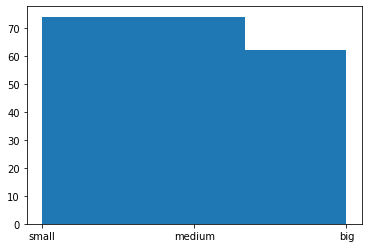

In [ ]:
import matplotlib.pyplot as plt
plt.hist(df['bins'], bins=3)

**Alternatively, we can set the edges of each bin manually.**

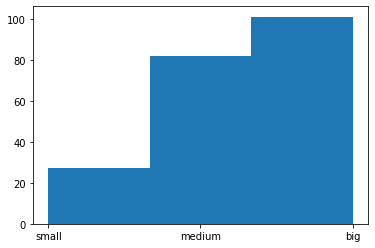

In [ ]:
bins = [ 0, 10, 50, 100 ]
df['bin_cut_manual'] = pd.cut(df['Cupcake'] , bins=bins, labels=labels, include_lowest=True)
plt.hist(df['bin_cut_manual'], bins=3)
plt.show()

### Binning by frequency

Binning by frequency calculates the size of each bin so that each bin contains the (almost) same number of observations, but the bin range will vary. 

We can use the Python pandas **qcut()** function. We can set the **precision** parameter to define the number of decimal points.


In [ ]:
df['bin_qcut'] = pd.qcut(df['Cupcake'], q=3, precision=1, labels=labels)
print(df['bin_qcut'].head(10))
print(df['bin_qcut'].unique())
print("\n")
print(df['bin_qcut'].value_counts())

0    small
1    small
2    small
3    small
4    small
5    small
6    small
7    small
8    small
9    small
Name: bin_qcut, dtype: category
Categories (3, object): ['small' < 'medium' < 'big']
['small', 'medium', 'big']
Categories (3, object): ['small' < 'medium' < 'big']


small     74
big       70
medium    66
Name: bin_qcut, dtype: int64


### Sampling

It permits to reduce the number of samples, by grouping similar values or contiguous values. There are three approaches to perform sampling:

* by bin means: each value in a bin is replaced by the mean value of the bin.
* by bin median: each bin value is replaced by its bin median value.
* by bin boundary: each bin value is replaced by the closest boundary value, i.e. maximum or minimum value of the bin.



In order to perform sampling, the **binned_statistic()** function of the **scipy.stats** package can be used. 

* This function receives two arrays as input, **x_data** and **y_data**, as well as the **statistics** to be used (e.g. median or mean) and the **number of bins** to be created. 

* The function returns the v**alues of the bins** as well as **the edges of each bin.**

In [ ]:
from scipy.stats import binned_statistic

x_data = np.arange(0, len(df))
y_data = df['Cupcake']
x_bins, bin_edges, misc = binned_statistic(y_data, x_data, statistic="median", bins=2)


In [ ]:
x_bins

array([ 56., 132.])

In [ ]:
bin_edges

array([  4.,  52., 100.])

In [ ]:
misc

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2,
       2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1])

Now we should approximate each value of the **df['Cupcake']** column to the median value of the corresponding bin. 

* Thus we convert the **bin edges** to an **IntervalIndex**, which receives as index the left and right edges of each interval. 

* In our case, the left edges starts from the beginning of the bin edges and do not contain the last value of the bin edges. 

* The right edges instead, start from the second value of the bin edges and last until the last value.

In [ ]:
bin_intervals = pd.IntervalIndex.from_arrays(bin_edges[:-1], bin_edges[1:])
bin_intervals

IntervalIndex([(4.0, 52.0], (52.0, 100.0]], dtype='interval[float64, right]')

We can **quantise** the **Cupcake** column by defining a **set_to_median()** function which loops through the intervals and when it finds the correct interval, it returns the mid value.

In [ ]:
def set_to_median(x, bin_intervals):
    for interval in bin_intervals:
        if x in interval:
            return interval.mid

* We use the **apply()** function to apply the **set_to_median()** to the **Cupcake** column.

In [ ]:
df['sampled_cupcake'] = df['Cupcake'].apply(lambda x: set_to_median(x, bin_intervals))
df['sampled_cupcake']

0      28.0
1      28.0
2      28.0
3      28.0
4       NaN
       ... 
205    28.0
206    28.0
207    28.0
208    28.0
209    28.0
Name: sampled_cupcake, Length: 210, dtype: float64

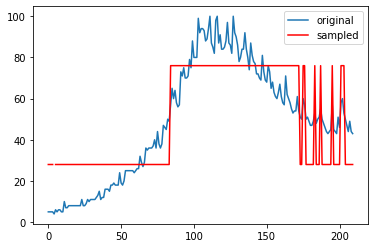

In [ ]:
plt.plot(df['Cupcake'], label='original')
plt.plot(df['sampled_cupcake'], color='red', label='sampled')
plt.legend()
plt.show()

**We see that there is the loss of information.**

Now, we can plot the **median** values. We can calculate the y values (**y_bins**) corresponding to the binned values (**x_bins**) as the values at the center of the bin range.

In [ ]:
y_bins = (bin_edges[:-1]+ bin_edges[1:]) / 2
y_bins

array([28., 76.])

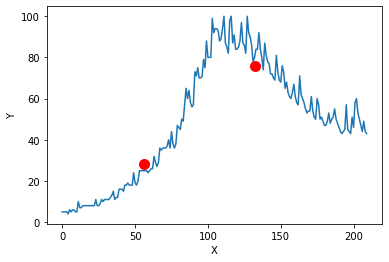

In [ ]:
plt.plot(x_data,y_data)
plt.xlabel("X"); 
plt.ylabel("Y")
plt.scatter(x_bins, y_bins,  color= 'red', linewidth=5)
plt.show()

## 7.Load huge CSV data

It may happen that you have a huge CSV dataset which occupies 4 or 5 GBytes (or even more) in your hard disk and you want to process it with Python pandas. 

Maybe you don't need all the data contained in the dataset, but only some records satisfying some criteria. We can apply four strategies:

* vertical filter
* horizontal filter
* memory
* bursts


### Vertical Filter

In this case we load only some columns of the whole dataset. We can use the parameter usecols of the read_csv() function to select only some columns.

In [ ]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/thieu1995/csv-files/main/data/pandas/hepatitis.csv', usecols=['age','sex'])
df.head()

,age,sex
0,30,male
1,50,female
2,78,female
3,31,female
4,34,female


### Horizontal Filter

In this case we load only some rows of the dataset. We can choose the starting row and how many rows we must load. Keep in mind that if we skip the first row, we must pass the names of the columns as further parameter.

In [ ]:
srow = 5
nrows = 50
columns = ['age','sex','steroid','antivirals','fatigue','malaise','anorexia',
           'liver_big','liver_firm','spleen_palpable','spiders','ascites','varices',
           'bilirubin','alk_phosphate','sgot','albumin','protime','histology','class']

df = pd.read_csv('https://raw.githubusercontent.com/thieu1995/csv-files/main/data/pandas/hepatitis.csv', 
                 skiprows=srow, nrows=nrows, names=columns)
df.head()

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
0,34,female,True,False,False,False,False,True,False,False,False,False,False,1.0,NaN,200.0,4.0,NaN,False,live
1,34,female,True,False,False,False,False,True,False,False,False,False,False,0.9,95.0,28.0,4.0,75.0,False,live
2,51,female,False,False,True,False,True,True,False,True,True,False,False,NaN,NaN,NaN,NaN,NaN,False,die
3,23,female,True,False,False,False,False,True,False,False,False,False,False,1.0,NaN,NaN,NaN,NaN,False,live
4,39,female,True,False,True,False,False,True,True,False,False,False,False,0.7,NaN,48.0,4.4,NaN,False,live


### Memory Configuration

Another option while reading huge datasets in Python pandas could be increasing the memory associated to the reading operation. This can be done through the **low_memory** parameter.


In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/thieu1995/csv-files/main/data/pandas/hepatitis.csv', 
                 low_memory=False)
df.head()

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
0,30,male,False,False,False,False,False,False,False,False,False,False,False,1.0,85.0,18.0,4.0,NaN,False,live
1,50,female,False,False,True,False,False,False,False,False,False,False,False,0.9,135.0,42.0,3.5,NaN,False,live
2,78,female,True,False,True,False,False,True,False,False,False,False,False,0.7,96.0,32.0,4.0,NaN,False,live
3,31,female,NaN,True,False,False,False,True,False,False,False,False,False,0.7,46.0,52.0,4.0,80.0,False,live
4,34,female,True,False,False,False,False,True,False,False,False,False,False,1.0,NaN,200.0,4.0,NaN,False,live


### Bursts

It may happen that we need to load the full dataset, but we don’t have enough memory to load it. Thus we can load it in bursts, then we apply some filters and store the results into another (smaller) dataset. Filters may include dropping operations and conversion from bigger to smaller types.

Firstly, we define a function called **read_burst()** which reads the i-th burst, performs some filters and then stores the results into another output csv file. 

In our case we can drop rows where **malaise = False**. We pass the starting row srow, the burst size burst the names of columns columns as parameters of the **read_burst()** function. 

When the starting row is equal to 1 we must also write the header to the output csv file. Thus we define a variable called **header**, which is set to True if **srow = 1.**





In [ ]:
def read_burst(srow, burst, columns):
    header = False
    if srow == 1:
        header = True
    df = pd.read_csv('https://raw.githubusercontent.com/thieu1995/csv-files/main/data/pandas/hepatitis.csv', 
                     skiprows=srow, nrows=burst, names=columns)
    df = df.drop(df[df['malaise'] == False].index)
    df.to_csv('hepatitis_small.csv', mode='a',header=header)

Now we can loop throughout the dataset. Note that we must know in advance the **number of lines of the csv file**. This can be done by using a command line tick. 

We can use the **wc** unix shell command. In order to run this command within the jupyther notebook, we must use the ! operator.

In [ ]:
! wc -l hepatitis.csv

wc: hepatitis.csv: No such file or directory


Our file contains 156 rows, thus we can set the maximum number of lines to be read to 156, since the first line corresponds to the header. We set **burst = 10**. Thus we read 100 at times. At the end, we run again the read_burst() function to load the last remaining rows.


In [ ]:
burst =10
srow = 1
nrows = 156
columns = ['age','sex','steroid','antivirals','fatigue','malaise','anorexia',
           'liver_big','liver_firm','spleen_palpable','spiders','ascites','varices',
           'bilirubin','alk_phosphate','sgot','albumin','protime','histology','class']

while srow < nrows:
    print('srow: ' + str(srow))
    read_burst(srow,burst,columns)
    srow = srow + burst
    
read_burst(srow,nrows,columns)

srow: 1
srow: 11
srow: 21
srow: 31
srow: 41
srow: 51
srow: 61
srow: 71
srow: 81
srow: 91
srow: 101
srow: 111
srow: 121
srow: 131
srow: 141
srow: 151


**Now we can load the smaller dataset.** We can drop the Unnamed: 0 column.

In [ ]:
df = pd.read_csv('hepatitis_small.csv')
df.head()

,Unnamed: 0,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,...,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
0,5,38,female,False,False,True,True,True,True,False,...,False,True,False,2.0,72.0,89.0,2.9,46.0,False,live
1,1,27,female,True,False,True,True,True,False,True,...,True,False,False,1.2,133.0,98.0,4.1,39.0,False,live
2,5,27,female,False,False,True,True,False,True,False,...,False,False,False,0.8,95.0,46.0,3.8,100.0,False,live
3,6,49,female,False,True,True,True,True,True,True,...,True,False,False,0.6,85.0,48.0,3.7,NaN,False,live
4,9,51,female,False,True,True,True,False,True,False,...,False,False,False,1.0,78.0,58.0,4.6,52.0,False,live


In [ ]:
df.drop(columns=['Unnamed: 0'],axis=1, inplace=True)
df.head()

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
0,38,female,False,False,True,True,True,True,False,False,False,True,False,2.0,72.0,89.0,2.9,46.0,False,live
1,27,female,True,False,True,True,True,False,True,True,True,False,False,1.2,133.0,98.0,4.1,39.0,False,live
2,27,female,False,False,True,True,False,True,False,False,False,False,False,0.8,95.0,46.0,3.8,100.0,False,live
3,49,female,False,True,True,True,True,True,True,False,True,False,False,0.6,85.0,48.0,3.7,NaN,False,live
4,51,female,False,True,True,True,False,True,False,False,False,False,False,1.0,78.0,58.0,4.6,52.0,False,live


## Resources

1. https://datagy.io/pandas-data-cleaning/
2. https://towardsdatascience.com/data-preprocessing-with-python-pandas-part-5-binning-c5bd5fd1b950
3. https://datascienceinpractice.github.io/tutorials/07-DataCleaning.html
4. https://www.analyseup.com/learn-python-for-data-science/python-pandas-cleaning-data.html
5. https://www.analyticsvidhya.com/blog/2021/06/data-cleaning-using-pandas/
6. https://datascientyst.com/data-cleaning-steps-python-example/
7. https://www.jcchouinard.com/preprocessing-in-scikit-learn/




# B.Preprocessing data with sklearn.preprocessing module 

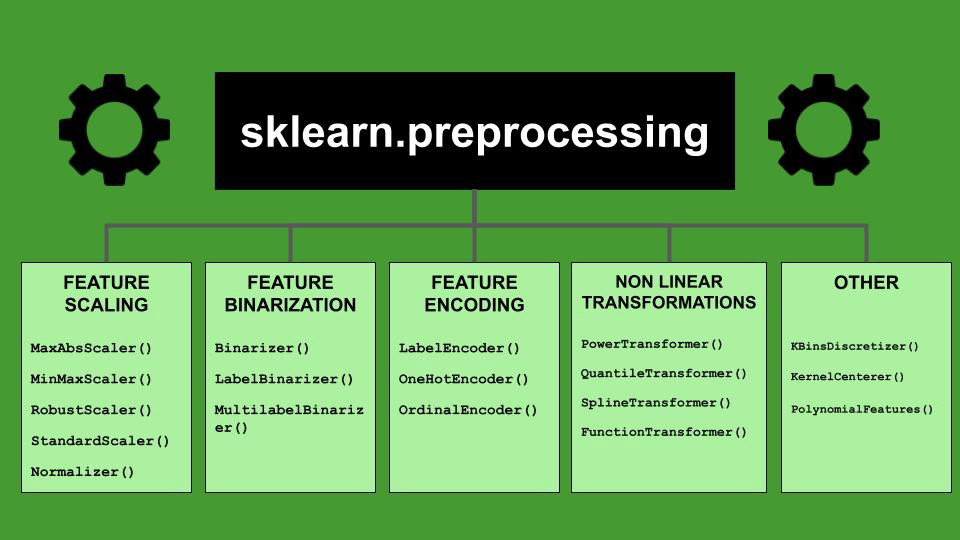

* Missing values
* Polynomial features
* Categorical features
* Numerical features
* Custom transformations
* Feature scaling
* Normalization


## 1.Imputation of missing values

In real world datasets, we often find many missing values. This can be because of various reasons — human error, sensor failure or different data type issue. The basic strategy people prefer is discarding all the rows containing missing values. But this reduces data quality and we may lose important information. Hence we need to find suitable strategies to deal with them and impute the missing values.

The **SimpleImputer** class provides basic strategies for imputing missing values. Missing values can be imputed with a provided **constant** value, or using the **statistics** of each column in which the missing values are located. This class also allows for different missing values encodings.

In [ ]:
import numpy as np
from sklearn.impute import SimpleImputer

imp = SimpleImputer(missing_values=np.nan, strategy='mean')
X = [[np.nan, 2], [6, np.nan], [7, 6]]
print(X)

X_new = imp.fit_transform(X)
print(X_new)

[[nan, 2], [6, nan], [7, 6]]
[[6.5 2. ]
 [6.  4. ]
 [7.  6. ]]


**The SimpleImputer also supports ‘most_frequent’ strategy which replaces the missing value by the most occuring value of the column**

In [ ]:
import pandas as pd 

df = pd.DataFrame([["a", "x"],
                   [np.nan, "y"],
                   ["a", np.nan],
                   ["b", "y"]], dtype="category")

imp = SimpleImputer(strategy="most_frequent")
imp.fit_transform(df)

array([['a', 'x'],
       ['a', 'y'],
       ['a', 'y'],
       ['b', 'y']], dtype=object)

## 2.Generating polynomial features

Most of the times while preprocessing, it is better to add complexity in our data. This can be achieved by generating polynomial features using **PolynomialFeatures** function



In [ ]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures

X = np.arange(6).reshape(3, 2)
X

array([[0, 1],
       [2, 3],
       [4, 5]])

In [ ]:
poly = PolynomialFeatures(degree=2)
poly.fit_transform(X)

array([[ 1.,  0.,  1.,  0.,  0.,  1.],
       [ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  4.,  5., 16., 20., 25.]])

In [ ]:
X1 = np.arange(12).reshape(3, 4)
X1

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [ ]:
poly.fit_transform(X1)

array([[  1.,   0.,   1.,   2.,   3.,   0.,   0.,   0.,   0.,   1.,   2.,
          3.,   4.,   6.,   9.],
       [  1.,   4.,   5.,   6.,   7.,  16.,  20.,  24.,  28.,  25.,  30.,
         35.,  36.,  42.,  49.],
       [  1.,   8.,   9.,  10.,  11.,  64.,  72.,  80.,  88.,  81.,  90.,
         99., 100., 110., 121.]])

* The features of X have been transformed from (X1, X2) to **( 1, X1, X2, X1², X1X2, X2²)**

So First column → [1, 1, 1]

Second column → X1 → [0, 2, 4]

Third column → X2 → [1, 3, 5]

Fourth column → X1² → [0, 4, 16]

Fifth column → X1X2 → [0, 6, 20]

Sixth column → X2² → [1, 9, 25]


## 3.Encoding categorical features

For example : the categorical features such as the Country from which a person belongs [ India, USA ], Gender [ Male, Female ]. Such features can be encoded as integers for machines to process them.

**OneHotEncoder** helps us in converting categorical variables to numerical features. 
It transforms each categorical feature with n_categories possible values into n_categories binary features, with one of them 1, and all others 0.



In [ ]:
x = [['Basketball','Male','USA'],['Football','Female','UK']]
x

[['Basketball', 'Male', 'USA'], ['Football', 'Female', 'UK']]

In [ ]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder()
enc.fit_transform(x).toarray()

array([[1., 0., 0., 1., 0., 1.],
       [0., 1., 1., 0., 1., 0.]])

In [ ]:
enc.categories_

[array(['Basketball', 'Football'], dtype=object),
 array(['Female', 'Male'], dtype=object),
 array(['UK', 'USA'], dtype=object)]

In [ ]:
enc.inverse_transform([[1, 0, 1, 0, 1, 0]])

array([['Basketball', 'Female', 'UK']], dtype=object)

## 4.Numerical features

Just like categorical data can be encoded, numerical features can be ‘decoded’ into categorical features. The two most common ways to do this are **discretization** and **binarization**.


### Discretization

Discretization, also known as quantization or binning, **divides a continuous feature into a pre-specified number of categories (bins)** and thus makes the data discrete.


**Discretization** is similar to constructing histograms for continuous data. **KBinsDiscretizer** implements different binning strategies, which can be selected with the strategy parameter.

By default the output is **one-hot encoded** into a sparse matrix and this can be configured with the **encode** parameter.


In [ ]:
from sklearn.preprocessing import KBinsDiscretizer

X = np.array([[ -3., 5., 15 ],
              [  0., 6., 14 ],
              [  6., 3., 11 ]])

est = KBinsDiscretizer(n_bins=[3, 2, 2], encode='ordinal')
est.fit_transform(X)

array([[0., 1., 1.],
       [1., 1., 1.],
       [2., 0., 0.]])

## 5.Standardization



In [ ]:
from sklearn import preprocessing
import numpy as np

# Height array in meters : [ 1, 1.5, 1.2 ]
# Weight array in Kgs : [ 72., 81., 75. ]

x = np.array([[ 1., 72.],
            [ 1.5,  81.],
             [1.2, 75.]])
x_scaled = preprocessing.scale(x)
x_scaled

array([[-1.13554995, -1.06904497],
       [ 1.29777137,  1.33630621],
       [-0.16222142, -0.26726124]])

* The preprocessing module further provides a utility class **StandardScalar** that implements the Transformer API to compute the mean and standard deviation on a training set so as to be able to later reapply the same transformation on the testing set.


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

x_sc = sc.fit_transform(x)
x_sc

array([[-1.13554995, -1.06904497],
       [ 1.29777137,  1.33630621],
       [-0.16222142, -0.26726124]])

* We get the same standardize output. Now if we need to get out original array back, we use the inverse_transform function on the same

In [ ]:
sc.inverse_transform(x_sc)

array([[ 1. , 72. ],
       [ 1.5, 81. ],
       [ 1.2, 75. ]])

* An alternative standardization is scaling features to lie between a given minimum and maximum value, often between zero and one, or so that the maximum absolute value of each feature is scaled to unit size. This can be achieved using **MinMaxScaler**.

* feature_range parameter inside MinMaxScaler function provides the minimum and maximum value for our scaling feature.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

msc = MinMaxScaler()
x_sc = msc.fit_transform(x)
x_sc

array([[0.        , 0.        ],
       [1.        , 1.        ],
       [0.4       , 0.33333333]])

## 6.Normalization

The function **normalize** provides a quick and easy way to perform this operation on a single array-like dataset, either using the **L1** or **L2** norms:

In [ ]:
from sklearn.preprocessing import Normalizer

nm = Normalizer()
x_sc = nm.fit_transform(x)
x_sc

array([[0.01388755, 0.99990356],
       [0.01851534, 0.99982858],
       [0.01599795, 0.99987202]])

## Resources

The full article: https://towardsdatascience.com/preprocessing-with-sklearn-a-complete-and-comprehensive-guide-670cb98fcfb9


1. https://medium.datadriveninvestor.com/the-complete-guide-to-preprocessing-in-scikit-learn-with-code-1bceed4befb6

2. https://scikit-learn.org/stable/modules/preprocessing.html

